In [0]:
from google.colab import files 
uploaded = files.upload()

Saving Breast_Cancer_Diagnostic.csv to Breast_Cancer_Diagnostic.csv


In [0]:
# Previously We Stuided Logistic Regression, KNN , Clustering 

In [0]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('Breast_Cancer_Diagnostic.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We will Only Consider 10 Real Valued Feature in this Project.
1. Radius_mean
2. texture_mean
3. perimeter_mean
4. area_mean
5. smoothness_mean
6. compactness_mean
7. concavity_mean
8. concavepoint_mean
9. symm
10. dia

UCI Machine Learning Repo. Updating from 1995 

In [0]:
df = df[['radius_mean','texture_mean','perimeter_mean',
         'area_mean','smoothness_mean','compactness_mean',
         'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','diagnosis']]
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,M
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,M


Let's Start with EDA

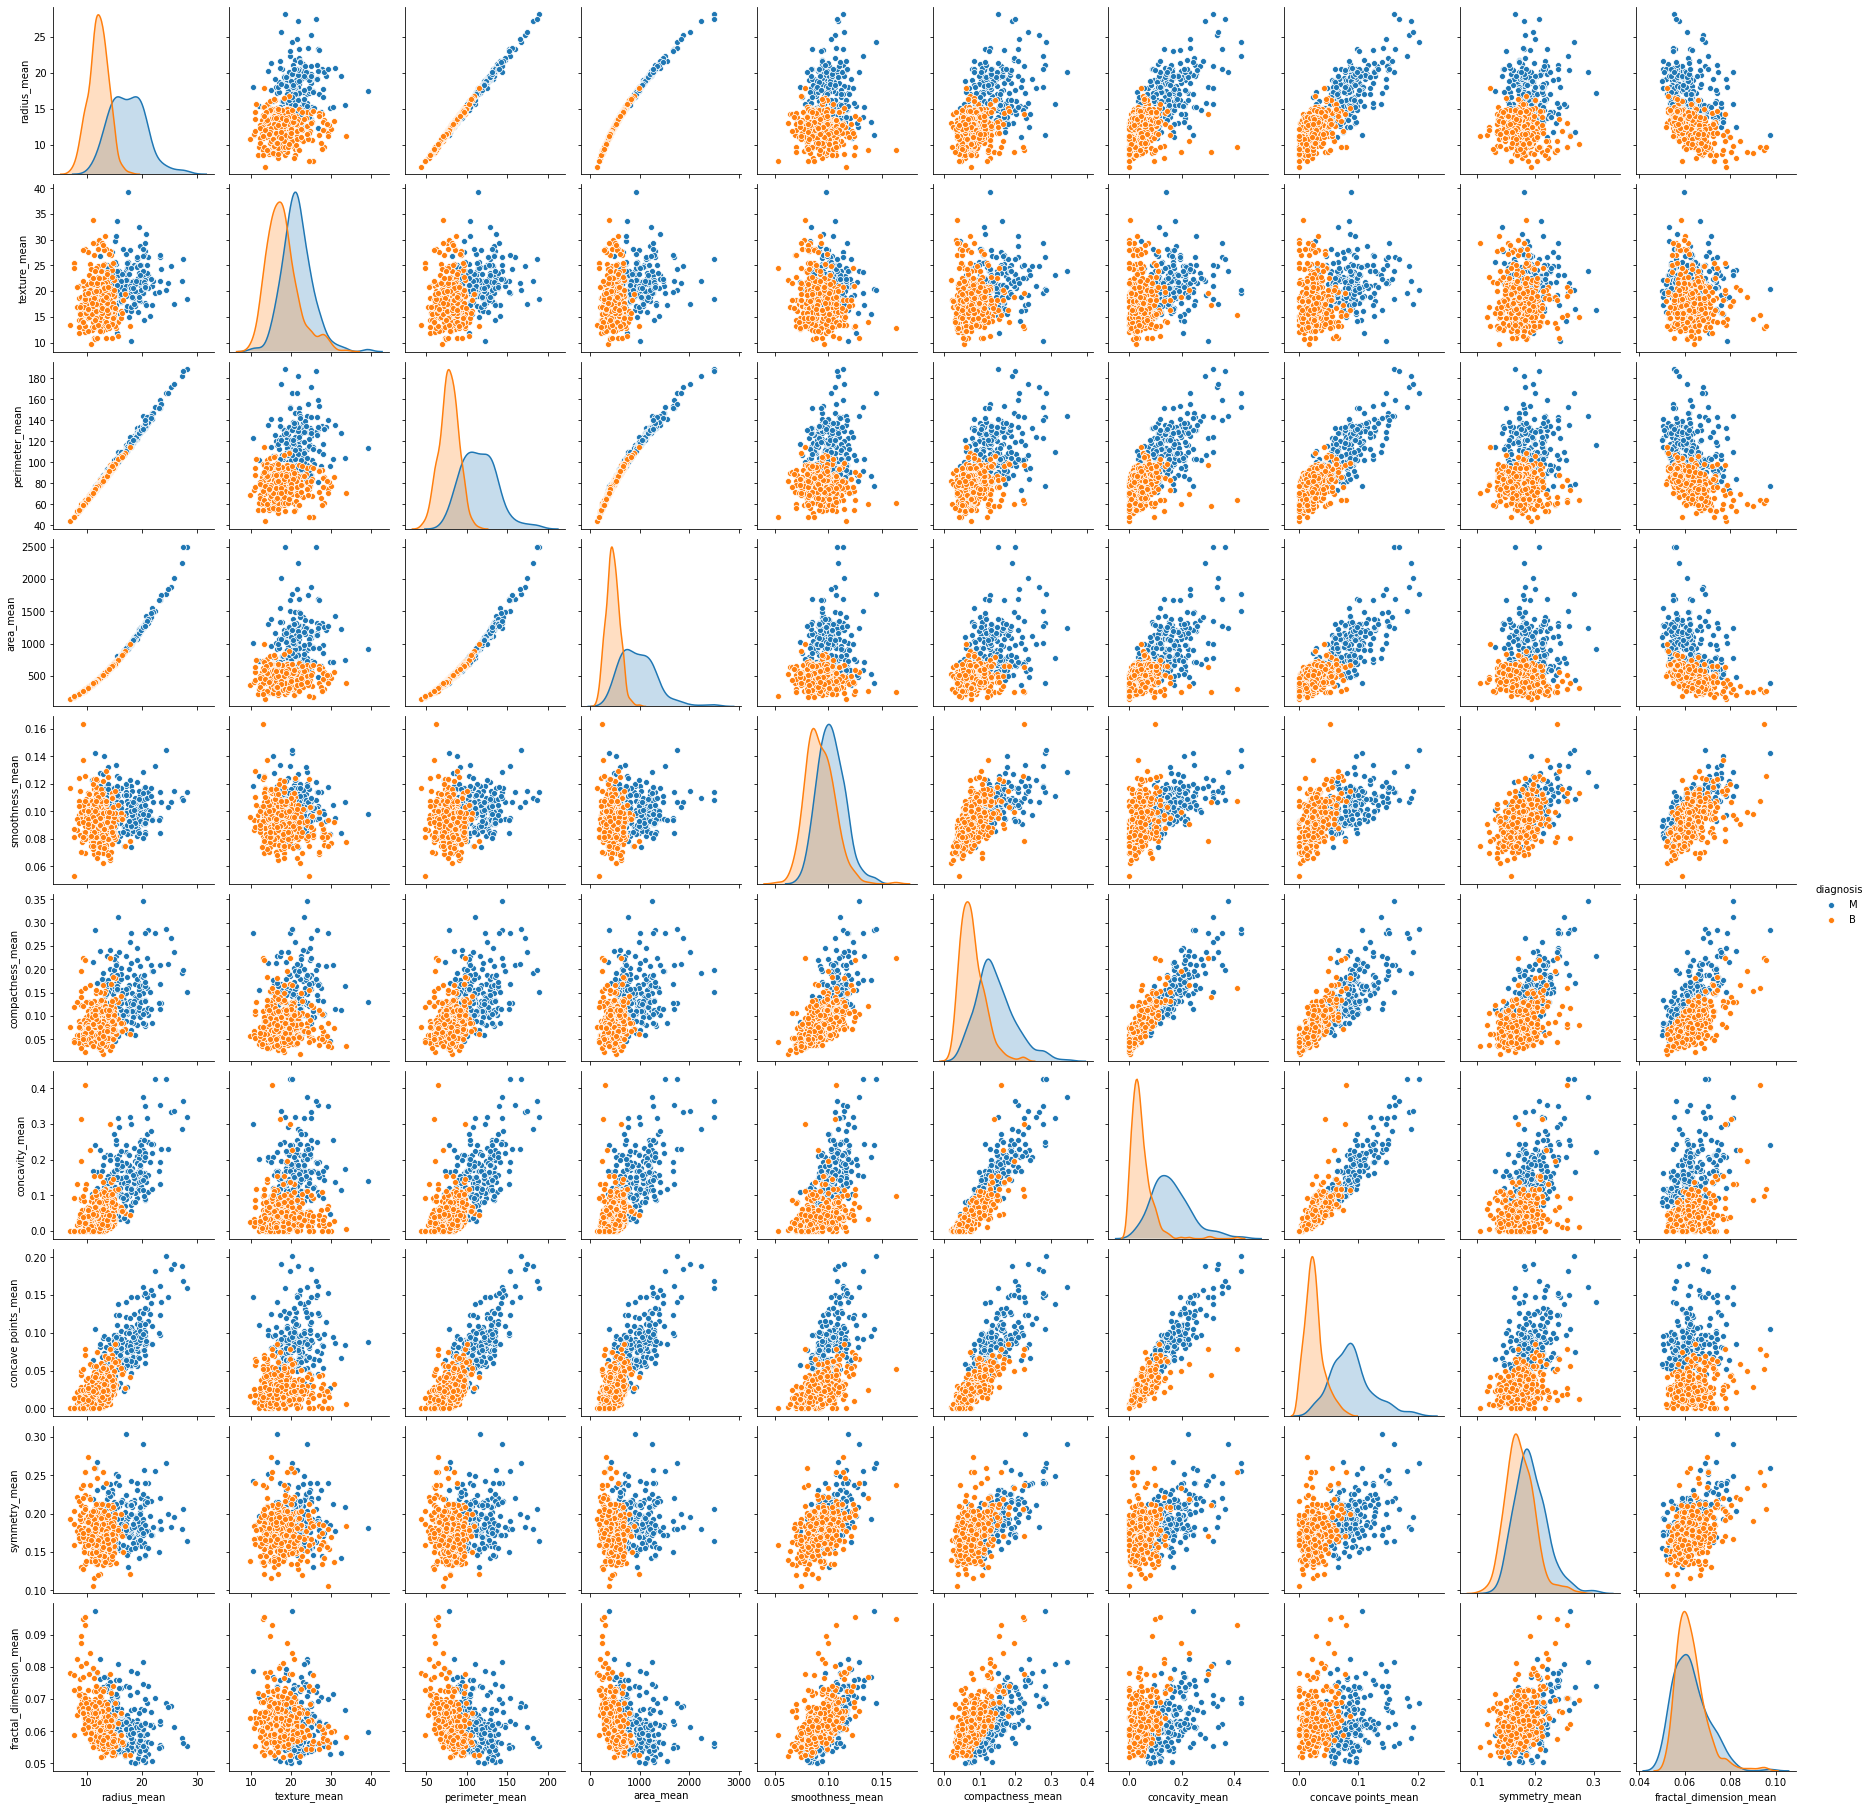

In [0]:
sns.pairplot(df,hue='diagnosis')

In [0]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [0]:
df['diagnosis'].nunique()

2

In [0]:
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.31,random_state=101)

In [0]:
# Few Steps that you lead to Run SVM Operations 
1. Importing Classifier
2. creating instance
3. train(fit) the model on training data and
4. do the prediction for test data 

In [0]:
# Importing Trating & Support Vector Classfier

from sklearn.svm import SVC

In [0]:
# Create Instance

svm_model = SVC()

In [0]:
# Training / Fitting Model
svm_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
- Number of paramter such as Alpha , Beta , Gamma, RBF 

In [0]:
# Prediction

predictions = svm_model.predict(X_test)

In [0]:
# Evaluation - Classification report & Confusion Matrix

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[106   3]
 [ 18  50]]
              precision    recall  f1-score   support

           B       0.85      0.97      0.91       109
           M       0.94      0.74      0.83        68

    accuracy                           0.88       177
   macro avg       0.90      0.85      0.87       177
weighted avg       0.89      0.88      0.88       177



We need to Adjust the parameters & Finding the right paramter is important and GridSearch Plays vital Role 

The C Parameter: Trades off misclassification, A Low C makes the decision surface smooth 

The Gamma: Defines How Far the influences of a single training example 

If Gamma too Large: the Radius of the Area Influences of the Support - is able to Prevent Overfitting 

If Gamma Too Small: cannot capture the complexity - Model Behave like Linear Model

Our Main Task to Create Best Value for C and Gamma 

In [0]:
param_grid = {'C':[0.01,0.1,1.0,10,100,1000,10000],
              'gamma':[1,0.1,0.01,0.001,0.0001,0.00001]}

In [0]:
# We have to import gridsearchcv from model_selection - CV - Cross Validation

from sklearn.model_selection import GridSearchCV

Lets Create an Instance and pass the following parameters

1. estimator
2. param_grid
3. verbose: integer ( controls the verbosity, the higher , the more messages. 
4. refit: boolean , Default = True * Refit is the best estimator with the entire dataset 

* GridSearchCV.. It is a meta Estimator , Similar type Support Vector Classifier and Create a new Estimator same as your grid 

In [0]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)

In [0]:
# Lets Try to Fit the Data Now 

grid.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................. C=0.01, gamma=0.001, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ............................. C=0.01, gamma=0.0001, total=   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ............................. C=0.01, gamma=0.0001, total=   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ............................. C=0.01, gamma=0.0001, total=   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ............................. C=0.01, gamma=0.0001, total=   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    2.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [0]:
grid_predictions = grid.predict(X_test)

In [0]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[103   6]
 [ 14  54]]
              precision    recall  f1-score   support

           B       0.88      0.94      0.91       109
           M       0.90      0.79      0.84        68

    accuracy                           0.89       177
   macro avg       0.89      0.87      0.88       177
weighted avg       0.89      0.89      0.89       177

